<a href="https://colab.research.google.com/github/grosa1/hands-on-ml-tutorials/blob/master/tutorial_1/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Pandas: Tutorial 1 - Hands on Machine Learning

*Pandas* è il package principale utilizzato per l'elaborazione di dati.
Il termine *pandas* deriva da "**pan**el **da**ta".
Principalmente si basa sul package **numpy** e viene largamente utilizzato in altri packages come **matplotlib** e **sci-kit learn**.

## Quali sono le funzioni principali di *pandas*?

- Rappresentazione dei dati sotto-forma di DataFrame (i.e. tabelle);

- Calcoli statistici e analisi preliminari sui dati (media, mediana, min, max, correlazione, distribuzione, ecc.);

- Pulizia dei dati intesa come rimozione di duplicati, riempimento di valori mancanti, normalizzazione e filtri su righe e colonne;

- Costruzione di dataset per modelli di machine learning, come divisione in training set e test set;

- Visualizzazione dei dati con l'aiuto di Matplotlib. Grafici a barre, linee, istogrammi, ecc.;

- Memorizzazione semplificata del dataset in vari formati, tra cui CSV, JSON oppure direttamente in un db (es. SQLite);




## Installazione e import

Con Anaconda: `conda install pandas`

Utilizzando pip: `pip install pandas`

Utilizzando Jupyter notebook, basta eseguire la cella che segue:

In [0]:
!pip install pandas

Usando `!` all'inizio di una cella, esegue il comando come se fosse lanciato da terminale

Per importare la libreria:

In [0]:
import pandas as pd

## Series e DataFrame

I componenti principali di *pandas* sono `Series` e `DataFrame`. 

Con `Series` si intende una colonna (array), e con `DataFrame` si intende una tabella multi-dimensionale composta da una collezione di `Series`. 

<img src=https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png width="50%">


### Creare un DataFrame

In [0]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
    }

purchases = pd.DataFrame(data)

purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

L'index si può definire a priori:

In [0]:
purchases = pd.DataFrame(data, index=["Berlino", "Rio", "Tokyo", "Nairobi"])

purchases

apples  oranges
Berlino       3        0
Rio           2        3
Tokyo         0        7
Nairobi       1        2

---
Con la funzione **loc**ate si può selezionare la singola riga. In questo caso usando il valore dell'index si ottiene:


In [0]:
purchases.loc["Rio"]

apples     2
oranges    3
Name: Rio, dtype: int64

### Caricamento di un file CSV

In [0]:
df = pd.read_csv('purchases.csv', index_col=0)

df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

### Lettura da file JSON

In [0]:
df = pd.read_json('purchases.json')

df

apples  oranges
David        1        2
June         3        0
Lily         0        7
Robert       2        3

### Lettura dei dati da un database SQL utilizzando SQLite


Da terminale: `pip install pysqlite3`

Oppure utilizzando Jupyter Notebook:

In [0]:
!pip install pysqlite3

Creiamo la connessione al database usando `sqlite3`. SQLite utilizza un normale file come db

In [0]:
import sqlite3

conn = sqlite3.connect("database.db")

Esempio di query SELECT:

In [0]:
df = pd.read_sql_query(sql="SELECT * FROM purchases", index_col='index', conn)

df

index  apples  oranges
0    June       3        0
1  Robert       2        3
2    Lily       0        7
3   David       1        2

### Salvataggio di un DataFrame in CSV, JSON, o SQL


In [0]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

df.to_sql('new_purchases', conn)

## Operazioni comuni con i DataFrame

Carichiamo un nuovo dataset. Il titolo dei film sarà il nostro index

In [0]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

### Visualizzazione dei dati 



In [0]:
movies_df.head()

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

`.head()` mostra di default le prime 5 righe del `DataFrame`. Si può impostare un numero diverso con `movies_df.head(10)`.

Per mostrare le ultime righe, abbiamo la funzione `.tail()`.

In [0]:
movies_df.tail(2)

Rank                  Genre  \
Title                                       
Search Party   999       Adventure,Comedy   
Nine Lives    1000  Comedy,Family,Fantasy   

                                                    Description  \
Title                                                             
Search Party  A pair of friends embark on a mission to reuni...   
Nine Lives    A stuffy businessman finds himself trapped ins...   

                      Director  \
Title                            
Search Party    Scot Armstrong   
Nine Lives    Barry Sonnenfeld   

                                                         Actors  Year  \
Title                                                                   
Search Party  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
Nine Lives    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

              Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
Title                                                                          
Search Party                 93     5.6   4881                 NaN       22.0  
Nine Lives                   87     5.3  12435               19.64       11.0

### Stampare le info sui dati



In [0]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


`.info()` mostra le informazioni di base del `DataFrame`, come numero di righe e colonne, numero di valori non-null, il tipo di dato e quanta memoria occupa il `DataFrame`. 

In questo caso le colonne `Revenue` e `Metascore` contengono dei valori null.

### Rimozione dei duplicati

Il dataset non presenta duplicati, ma ne aggiungeremo manualmente raddoppiando il `DataFrame`

In [0]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Per eseguire il drop dei duplicati:

In [0]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

`append()` e `drop_duplicates()` di default ritornano una copia del `DataFrame`, lasciando inalterato quello originale. La maggior parte delle funzioni in *pandas* permettono di eseguire l'operazione in-place con il parametro `inplace=True`.

In [0]:
temp_df.drop_duplicates(inplace=True)

Un altro parametro importante per `drop_duplicates()` è `keep`, `che ha 3 opzioni:

* `first`: (default) Drop di tutti i duplicati tranne la prima occorrenza;
* `last`: Drop di tutti i duplicati tranne l'ultimo;
* `False`: Drop di tutti i duplicati.

In [0]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

### Operazioni sulle colonne


In [0]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [0]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Si possono direttamente rinominare tutte le colonne anche con:

In [0]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Usando list comprehension di Python:

In [0]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Valori mancanti, cosa fare?

Quando ci sono valori mancanti, spesso vediamo il placeholder di Python `None` oppure quello di NumPy `np.nan`, che vengono gestiti in maniera diversa.

Abbiamo 2 opzioni: 

1. Eliminare le righe o le colonne con valori null;
2. Sostituire i valori null con valori non-null (**imputation**).


In [0]:
movies_df.isnull()

rank  genre  description  director  actors   year  \
Title                                                                         
Guardians of the Galaxy  False  False        False     False   False  False   
Prometheus               False  False        False     False   False  False   
Split                    False  False        False     False   False  False   
Sing                     False  False        False     False   False  False   
Suicide Squad            False  False        False     False   False  False   

                         runtime  rating  votes  revenue_millions  metascore  
Title                                                                         
Guardians of the Galaxy    False   False  False             False      False  
Prometheus                 False   False  False             False      False  
Split                      False   False  False             False      False  
Sing                       False   False  False             False      False  
Suicide Squad              False   False  False             False      False

In [0]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

La funzione `.isnull()` ritorna un `DataFrame` con valori booleani, che indicano se il valore è null oppure no. Utilizzando in combinazione la funzione `sum()` si può fare il conteggio dei valori null.

.

#### Rimozione dei valori null


In [0]:
movies_df.dropna()

rank                       genre  \
Title                                                                       
Guardians of the Galaxy                     1     Action,Adventure,Sci-Fi   
Prometheus                                  2    Adventure,Mystery,Sci-Fi   
Split                                       3             Horror,Thriller   
Sing                                        4     Animation,Comedy,Family   
Suicide Squad                               5    Action,Adventure,Fantasy   
The Great Wall                              6    Action,Adventure,Fantasy   
La La Land                                  7          Comedy,Drama,Music   
The Lost City of Z                          9  Action,Adventure,Biography   
Passengers                                 10     Adventure,Drama,Romance   
Fantastic Beasts and Where to Find Them    11    Adventure,Family,Fantasy   
Hidden Figures                             12     Biography,Drama,History   
Rogue One                                  13     Action,Adventure,Sci-Fi   
Moana                                      14  Animation,Adventure,Comedy   
Colossal                                   15         Action,Comedy,Drama   
The Secret Life of Pets                    16  Animation,Adventure,Comedy   
Hacksaw Ridge                              17     Biography,Drama,History   
Jason Bourne                               18             Action,Thriller   
Lion                                       19             Biography,Drama   
Arrival                                    20        Drama,Mystery,Sci-Fi   
Gold                                       21    Adventure,Drama,Thriller   
Manchester by the Sea                      22                       Drama   
Trolls                                     24  Animation,Adventure,Comedy   
Independence Day: Resurgence               25     Action,Adventure,Sci-Fi   
Bad Moms                                   29                      Comedy   
Assassin's Creed                           30      Action,Adventure,Drama   
Why Him?                                   31                      Comedy   
Nocturnal Animals                          32              Drama,Thriller   
X-Men: Apocalypse                          33     Action,Adventure,Sci-Fi   
Deadpool                                   34     Action,Adventure,Comedy   
Resident Evil: The Final Chapter           35        Action,Horror,Sci-Fi   
...                                       ...                         ...   
That Awkward Moment                       956              Comedy,Romance   
Legion                                    957       Action,Fantasy,Horror   
End of Watch                              958        Crime,Drama,Thriller   
3 Days to Kill                            959       Action,Drama,Thriller   
Lucky Number Slevin                       960         Crime,Drama,Mystery   
Trance                                    961         Crime,Drama,Mystery   
Into the Forest                           962       Drama,Sci-Fi,Thriller   
The Other Boleyn Girl                     963     Biography,Drama,History   
I Spit on Your Grave                      964       Crime,Horror,Thriller   
Texas Chainsaw 3D                         971             Horror,Thriller   
Rock of Ages                              973        Comedy,Drama,Musical   
Scream 4                                  974              Horror,Mystery   
Queen of Katwe                            975       Biography,Drama,Sport   
My Big Fat Greek Wedding 2                976       Comedy,Family,Romance   
The Skin I Live In                        980              Drama,Thriller   
Miracles from Heaven                      981      Biography,Drama,Family   
Annie                                     982         Comedy,Drama,Family   
Across the Universe                       983       Drama,Fantasy,Musical   
Let's Be Cops                             984                      Comedy   
Max                                  

In [0]:
movies_df.dropna(axis=1)

rank                       genre  \
Title                                                                       
Guardians of the Galaxy                     1     Action,Adventure,Sci-Fi   
Prometheus                                  2    Adventure,Mystery,Sci-Fi   
Split                                       3             Horror,Thriller   
Sing                                        4     Animation,Comedy,Family   
Suicide Squad                               5    Action,Adventure,Fantasy   
The Great Wall                              6    Action,Adventure,Fantasy   
La La Land                                  7          Comedy,Drama,Music   
Mindhorn                                    8                      Comedy   
The Lost City of Z                          9  Action,Adventure,Biography   
Passengers                                 10     Adventure,Drama,Romance   
Fantastic Beasts and Where to Find Them    11    Adventure,Family,Fantasy   
Hidden Figures                             12     Biography,Drama,History   
Rogue One                                  13     Action,Adventure,Sci-Fi   
Moana                                      14  Animation,Adventure,Comedy   
Colossal                                   15         Action,Comedy,Drama   
The Secret Life of Pets                    16  Animation,Adventure,Comedy   
Hacksaw Ridge                              17     Biography,Drama,History   
Jason Bourne                               18             Action,Thriller   
Lion                                       19             Biography,Drama   
Arrival                                    20        Drama,Mystery,Sci-Fi   
Gold                                       21    Adventure,Drama,Thriller   
Manchester by the Sea                      22                       Drama   
Hounds of Love                             23          Crime,Drama,Horror   
Trolls                                     24  Animation,Adventure,Comedy   
Independence Day: Resurgence               25     Action,Adventure,Sci-Fi   
Paris pieds nus                            26                      Comedy   
Bahubali: The Beginning                    27      Action,Adventure,Drama   
Dead Awake                                 28             Horror,Thriller   
Bad Moms                                   29                      Comedy   
Assassin's Creed                           30      Action,Adventure,Drama   
...                                       ...                         ...   
Texas Chainsaw 3D                         971             Horror,Thriller   
Disturbia                                 972      Drama,Mystery,Thriller   
Rock of Ages                              973        Comedy,Drama,Musical   
Scream 4                                  974              Horror,Mystery   
Queen of Katwe                            975       Biography,Drama,Sport   
My Big Fat Greek Wedding 2                976       Comedy,Family,Romance   
Dark Places                               977      Drama,Mystery,Thriller   
Amateur Night                             978                      Comedy   
It's Only the End of the World            979                       Drama   
The Skin I Live In                        980              Drama,Thriller   
Miracles from Heaven                      981      Biography,Drama,Family   
Annie                                     982         Comedy,Drama,Family   
Across the Universe                       983       Drama,Fantasy,Musical   
Let's Be Cops                             984                      Comedy   
Max                                       985            Adventure,Family   
Your Highness                             986    Adventure,Comedy,Fantasy   
Final Destination 5                       987             Horror,Thriller   
Endless Love                              988               Drama,Romance   
Martyrs                                   989                      Horror   
Selma                                

In questo modo vengono eliminate tutte le righe con almeno un valore null, mentre con il parametro `axis=1` viene fatta la stessa cosa con le colonne.

Per eliminare le righe che presentano un valore null solo su una specifica colonna:

In [0]:
movies_df.dropna(subset=['revenue_millions'])

**Come funziona il parametro `axis=1`?**

con la funzione `.shape()` otteniamo una tupla che rappresenta il DataFrame, dove abbiamo in posizione 0 il nuemro di righe e in posizione 1 il numero di colonne. Quindi con `axis=1` vengono selezionate le colonne. Questo tipo di operazione deriva dalle funzioni offerte da `NumPy`.

In [0]:
movies_df.shape

(1000, 11)

### Imputation

L'imputazione consiste nel sostituire i valori mancanti con altri valori che non alterano il significato dei dati. Solitamente i valori nulli vengono sostituiti con la *media* o la *mediana* dei valori della specifica colonna. 


In [0]:
revenue = movies_df['revenue_millions']

In [0]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [0]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

Con la funzione `fillna()` vengono sotituiti i valori null:

In [0]:
revenue.fillna(revenue_mean, inplace=True)

In [0]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

### Descrizione dei valori di un `DataFrame`

Con la funzione `describe()` si ottiene un sommario dei valori del `Dataframe`:

In [0]:
movies_df.describe()

rank         year      runtime       rating         votes  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000   113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962    18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000    66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000   100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000   111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000   123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000   191.000000     9.000000  1.791916e+06   

       revenue_millions   metascore  
count       1000.000000  936.000000  
mean          82.956376   58.985043  
std           96.412043   17.194757  
min            0.000000   11.000000  
25%           17.442500   47.000000  
50%           60.375000   59.500000  
75%           99.177500   72.000000  
max          936.630000  100.000000

`.describe()` mostra informazioni descrittive come numero di righe, conteggio dei valori unici e frequenza del valore che occorre maggiormente anche sulla singola colonna:

In [0]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

Con la funzione `.value_counts()` otteniamo la frequenza di tutti i valori contenuti nella colonna:

In [0]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

#### Calcolo della correlazione tra variabili

In [0]:
movies_df.corr()

rank      year   runtime    rating     votes  \
rank              1.000000 -0.261605 -0.221739 -0.219555 -0.283876   
year             -0.261605  1.000000 -0.164900 -0.211219 -0.411904   
runtime          -0.221739 -0.164900  1.000000  0.392214  0.407062   
rating           -0.219555 -0.211219  0.392214  1.000000  0.511537   
votes            -0.283876 -0.411904  0.407062  0.511537  1.000000   
revenue_millions -0.252996 -0.117562  0.247834  0.189527  0.607941   
metascore        -0.191869 -0.079305  0.211978  0.631897  0.325684   

                  revenue_millions  metascore  
rank                     -0.252996  -0.191869  
year                     -0.117562  -0.079305  
runtime                   0.247834   0.211978  
rating                    0.189527   0.631897  
votes                     0.607941   0.325684  
revenue_millions          1.000000   0.133328  
metascore                 0.133328   1.000000

Interessante:  la correlazione tra `votes` e `revenue_millions` è 0.6, dove il valore massimo valore di correlazione è 1 ottenuto solo dalle colonne uguali


### Slicing, selezione ed estrazione


#### Estrazione di una colonna


In [0]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

Ritorna un oggetto *Series*. Per estrarre una colonna sotto forma di *DataFrame*, bisogna passare i nomi delle colonne:

In [0]:
subset = movies_df[['genre', 'rating']]

subset.head()

genre  rating
Title                                                    
Guardians of the Galaxy   Action,Adventure,Sci-Fi     8.1
Prometheus               Adventure,Mystery,Sci-Fi     7.0
Split                             Horror,Thriller     7.3
Sing                      Animation,Comedy,Family     7.2
Suicide Squad            Action,Adventure,Fantasy     6.2

#### Estrazione di una o più righe

Abbiamo 2 opzioni: 

- `.loc` - **loc**ate per nome;
- `.iloc`- **loc**ate per **i**ndex numerico.

Per estrarre il titolo di un film, bisogna avere un index sulla colonna `Title`, poi usare la funzione `.loc` o `.iloc`:

In [0]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [0]:
prom = movies_df.iloc[1]

Selezione multipla facendo lo slicing delle liste:

In [0]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4] # the movie at index 4 is not included

movie_subset

rank                     genre  \
Title                                        
Prometheus     2  Adventure,Mystery,Sci-Fi   
Split          3           Horror,Thriller   
Sing           4   Animation,Comedy,Family   

                                                  description  \
Title                                                           
Prometheus  Following clues to the origin of mankind, a te...   
Split       Three girls are kidnapped by a man with a diag...   
Sing        In a city of humanoid animals, a hustling thea...   

                        director  \
Title                              
Prometheus          Ridley Scott   
Split         M. Night Shyamalan   
Sing        Christophe Lourdelet   

                                                       actors  year  runtime  \
Title                                                                          
Prometheus  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124   
Split       James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117   
Sing        Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108   

            rating   votes  revenue_millions  metascore  
Title                                                    
Prometheus     7.0  485820            126.46       65.0  
Split          7.3  157606            138.12       62.0  
Sing           7.2   60545            270.32       59.0

#### Selezioni condizionali
Usando una boolean condition:

In [0]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

rank                     genre  \
Title                                                    
Prometheus                 2  Adventure,Mystery,Sci-Fi   
The Martian              103    Adventure,Drama,Sci-Fi   
Robin Hood               388    Action,Adventure,Drama   
American Gangster        471     Biography,Crime,Drama   
Exodus: Gods and Kings   517    Action,Adventure,Drama   

                                                              description  \
Title                                                                       
Prometheus              Following clues to the origin of mankind, a te...   
The Martian             An astronaut becomes stranded on Mars after hi...   
Robin Hood              In 12th century England, Robin and his band of...   
American Gangster       In 1970s America, a detective works to bring d...   
Exodus: Gods and Kings  The defiant leader Moses rises up against the ...   

                            director  \
Title                                  
Prometheus              Ridley Scott   
The Martian             Ridley Scott   
Robin Hood              Ridley Scott   
American Gangster       Ridley Scott   
Exodus: Gods and Kings  Ridley Scott   

                                                                   actors  \
Title                                                                       
Prometheus              Noomi Rapace, Logan Marshall-Green, Michael Fa...   
The Martian             Matt Damon, Jessica Chastain, Kristen Wiig, Ka...   
Robin Hood              Russell Crowe, Cate Blanchett, Matthew Macfady...   
American Gangster       Denzel Washington, Russell Crowe, Chiwetel Eji...   
Exodus: Gods and Kings  Christian Bale, Joel Edgerton, Ben Kingsley, S...   

                        year  runtime  rating   votes  revenue_millions  \
Title                                                                     
Prometheus              2012      124     7.0  485820            126.46   
The Martian             2015      144     8.0  556097            228.43   
Robin Hood              2010      140     6.7  221117            105.22   
American Gangster       2007      157     7.8  337835            130.13   
Exodus: Gods and Kings  2014      150     6.0  137299             65.01   

                        metascore rating_category  
Title                                              
Prometheus                   65.0             bad  
The Martian                  80.0            good  
Robin Hood                   53.0             bad  
American Gangster            76.0             bad  
Exodus: Gods and Kings       52.0             bad

Usando condizioni con valori numerici:

In [0]:
movies_df[movies_df['rating'] >= 8.6].head(3)

rank                    genre  \
Title                                            
Interstellar       37   Adventure,Drama,Sci-Fi   
The Dark Knight    55       Action,Crime,Drama   
Inception          81  Action,Adventure,Sci-Fi   

                                                       description  \
Title                                                                
Interstellar     A team of explorers travel through a wormhole ...   
The Dark Knight  When the menace known as the Joker wreaks havo...   
Inception        A thief, who steals corporate secrets through ...   

                          director  \
Title                                
Interstellar     Christopher Nolan   
The Dark Knight  Christopher Nolan   
Inception        Christopher Nolan   

                                                            actors  year  \
Title                                                                      
Interstellar     Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
Inception        Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010   

                 runtime  rating    votes  revenue_millions  metascore  
Title                                                                   
Interstellar         169     8.6  1047747            187.99       74.0  
The Dark Knight      152     9.0  1791916            533.32       82.0  
Inception            148     8.8  1583625            292.57       74.0

Concatenare condizioni usando gli operatori booleani:
- `|` = `OR` 
- `&` = `AND` 


In [0]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

rank                     genre  \
Title                                             
Prometheus          2  Adventure,Mystery,Sci-Fi   
Interstellar       37    Adventure,Drama,Sci-Fi   
The Dark Knight    55        Action,Crime,Drama   
The Prestige       65      Drama,Mystery,Sci-Fi   
Inception          81   Action,Adventure,Sci-Fi   

                                                       description  \
Title                                                                
Prometheus       Following clues to the origin of mankind, a te...   
Interstellar     A team of explorers travel through a wormhole ...   
The Dark Knight  When the menace known as the Joker wreaks havo...   
The Prestige     Two stage magicians engage in competitive one-...   
Inception        A thief, who steals corporate secrets through ...   

                          director  \
Title                                
Prometheus            Ridley Scott   
Interstellar     Christopher Nolan   
The Dark Knight  Christopher Nolan   
The Prestige     Christopher Nolan   
Inception        Christopher Nolan   

                                                            actors  year  \
Title                                                                      
Prometheus       Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
Interstellar     Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
The Prestige     Christian Bale, Hugh Jackman, Scarlett Johanss...  2006   
Inception        Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010   

                 runtime  rating    votes  revenue_millions  metascore  
Title                                                                   
Prometheus           124     7.0   485820            126.46       65.0  
Interstellar         169     8.6  1047747            187.99       74.0  
The Dark Knight      152     9.0  1791916            533.32       82.0  
The Prestige         130     8.5   913152             53.08       66.0  
Inception            148     8.8  1583625            292.57       74.0

Filtrare i valori utilizzando come condizione la funzione `isin()`:

In [0]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

rank                     genre  \
Title                                             
Prometheus          2  Adventure,Mystery,Sci-Fi   
Interstellar       37    Adventure,Drama,Sci-Fi   
The Dark Knight    55        Action,Crime,Drama   
The Prestige       65      Drama,Mystery,Sci-Fi   
Inception          81   Action,Adventure,Sci-Fi   

                                                       description  \
Title                                                                
Prometheus       Following clues to the origin of mankind, a te...   
Interstellar     A team of explorers travel through a wormhole ...   
The Dark Knight  When the menace known as the Joker wreaks havo...   
The Prestige     Two stage magicians engage in competitive one-...   
Inception        A thief, who steals corporate secrets through ...   

                          director  \
Title                                
Prometheus            Ridley Scott   
Interstellar     Christopher Nolan   
The Dark Knight  Christopher Nolan   
The Prestige     Christopher Nolan   
Inception        Christopher Nolan   

                                                            actors  year  \
Title                                                                      
Prometheus       Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
Interstellar     Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
The Prestige     Christian Bale, Hugh Jackman, Scarlett Johanss...  2006   
Inception        Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010   

                 runtime  rating    votes  revenue_millions  metascore  
Title                                                                   
Prometheus           124     7.0   485820            126.46       65.0  
Interstellar         169     8.6  1047747            187.99       74.0  
The Dark Knight      152     9.0  1791916            533.32       82.0  
The Prestige         130     8.5   913152             53.08       66.0  
Inception            148     8.8  1583625            292.57       74.0

Estrazione dei film presentati tra il 2005 e il 2010, con un rating maggiore di 8.0 ma che hanno ottenuto meno del 25% delle entrate:

In [0]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

rank               genre  \
Title                                           
3 Idiots              431        Comedy,Drama   
The Lives of Others   477      Drama,Thriller   
Incendies             714   Drama,Mystery,War   
Taare Zameen Par      992  Drama,Family,Music   

                                                           description  \
Title                                                                    
3 Idiots             Two friends are searching for their long lost ...   
The Lives of Others  In 1984 East Berlin, an agent of the secret po...   
Incendies            Twins journey to the Middle East to discover t...   
Taare Zameen Par     An eight-year-old boy is thought to be a lazy ...   

                                             director  \
Title                                                   
3 Idiots                              Rajkumar Hirani   
The Lives of Others  Florian Henckel von Donnersmarck   
Incendies                            Denis Villeneuve   
Taare Zameen Par                           Aamir Khan   

                                                                actors  year  \
Title                                                                          
3 Idiots               Aamir Khan, Madhavan, Mona Singh, Sharman Joshi  2009   
The Lives of Others  Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...  2006   
Incendies            Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...  2010   
Taare Zameen Par     Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...  2007   

                     runtime  rating   votes  revenue_millions  metascore  
Title                                                                      
3 Idiots                 170     8.4  238789              6.52       67.0  
The Lives of Others      137     8.5  278103             11.28       89.0  
Incendies                131     8.2   92863              6.86       80.0  
Taare Zameen Par         165     8.5  102697              1.20       42.0

**N.B.** usando la funzione `.describe()`, otteniamo che il 25% delle entrate totali è 17,4.
Usando la funzione `.quantile()`, viene calcolato direttamente il valore percentuale sul totale.

## Applicare funzioni

Per applicare funzioni sui valori di un `DataFrame` è possibile adoperare i classici for-each loop, che risultano inefficienti su dataset di grandi dimensioni. Un metodo efficace e allo stesso modo efficiente è utilizzare la funzione `apply()`. In questo caso aggiungiamo il risultato in una nuova colonna `rating_category`:

In [0]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

In [0]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

rank                     genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   

                                                               description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   

                             director  \
Title                                   
Guardians of the Galaxy    James Gunn   
Prometheus               Ridley Scott   

                                                                    actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   

                         year  runtime  rating   votes  revenue_millions  \
Title                                                                      
Guardians of the Galaxy  2014      121     8.1  757074            333.13   
Prometheus               2012      124     7.0  485820            126.46   

                         metascore rating_category  
Title                                               
Guardians of the Galaxy       76.0            good  
Prometheus                    65.0             bad

**Perchè `apply()` è più efficiente?**

Sfrutta la tecnica della vettorizzazione, dove vengono processati più elementi dell'array simultaneamente anzichè uno alla volta.

https://stackoverflow.com/questions/1422149/what-is-vectorization

## Esempi di Plotting


In [0]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

**Importante:**
- Per variabili categoriche: grafici a barre e boxplot;
- Per variabili numeriche: istogrammi, scatterplot, grafici a linee e boxplot.



Per il plot della relazione tra `ratings` and `revenue`:

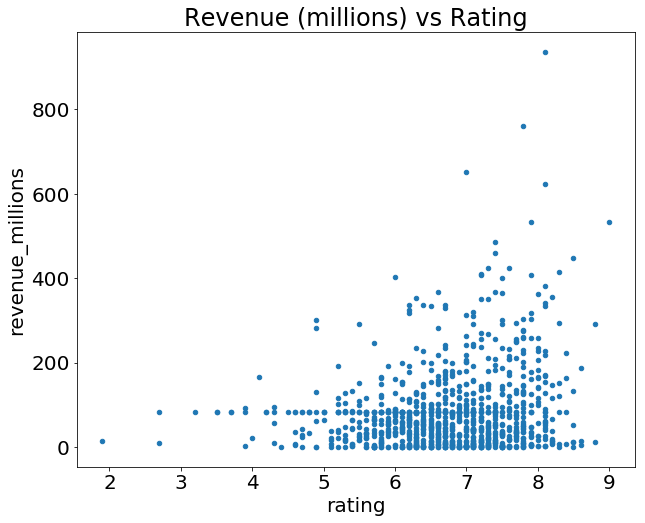

In [0]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

Mettendo `;` alla fine, si nasconde la stampa di `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` usando Jupyter notebooks.




Plot su singola colonna:

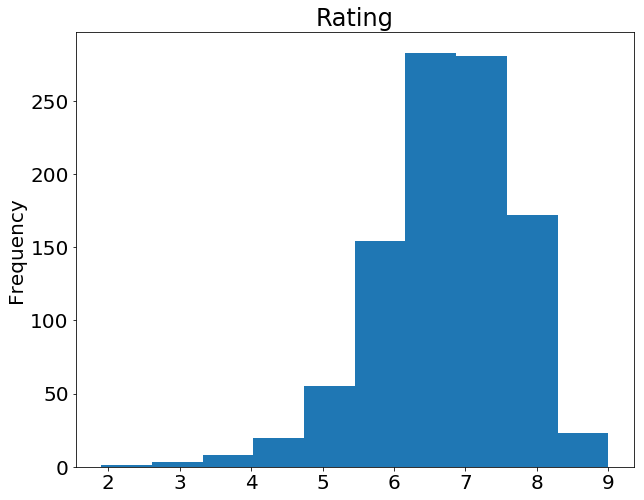

In [0]:
movies_df['rating'].plot(kind='hist', title='Rating');

Con il boxplot abbiamo una rappresentazione grafica della funzione `.describe()`:

In [0]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

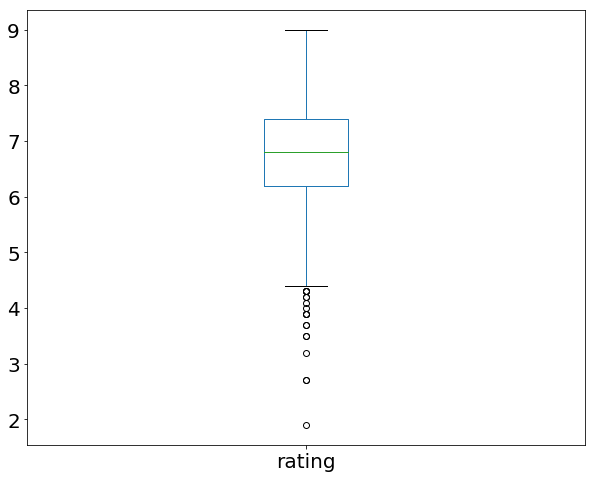

In [0]:
movies_df['rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>

Boxplot dei valori di `revenue` raggruppati per `rating_category`:

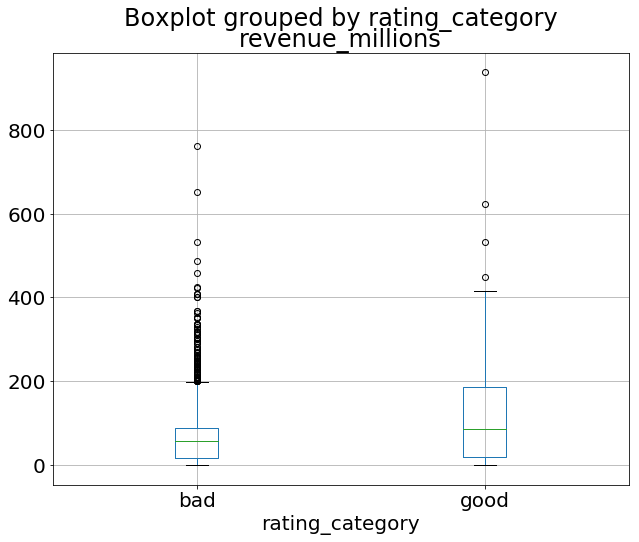

In [0]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

## Link utili

- Altre informazioni sul plot dei dati: [link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- Tutorial ufficiali su *pandas*: [link](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)

- Per esempi pratici: [Kaggle kernels](https://www.kaggle.com/kernels)

- Versione originale dell'articolo da cui è stato costruito questo tutorial: [link](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)